# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 0.77857586,  1.2981237 ],
        [-1.19349218,  0.77073926],
        [-0.71271145,  1.33158537],
        [-0.63735634,  1.08899748],
        [-1.44423118, -0.87639057]]),
 array([1, 0, 0, 0, 0]))

In [4]:
m1 = np.array([1,1])
m2 = np.array([0,0])
pi = 0.5
sigma = np.array([[1, -0.5],[-0.5, 1]])

In [5]:
# sampling
n = 1000
X1_generative = np.random.multivariate_normal(m1, sigma, n//2)
X2_generative = np.random.multivariate_normal(m2, sigma, n//2)
X_generative = np.append(X1_generative, X2_generative, axis=0)
Y_generative = np.append(np.ones(n//2), np.zeros(n//2))*2 -1

In [6]:
from scipy.stats import multivariate_normal
var1 = multivariate_normal(mean=m1, cov=sigma)
var2 = multivariate_normal(mean=m2, cov=sigma)
var1.pdf([1,0])
p_xy_p1 = var1.pdf(X_generative)
p_xy_n1 = var2.pdf(X_generative)
p_x = p_xy_p1*pi+p_xy_n1*(1-pi)
p_yx = (p_xy_p1*pi)/p_x

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

Yes it does.

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [7]:
# computing beta_0 and beta using the formulas
b0 = np.log(pi/(1-pi))+0.5*m2.T@np.linalg.inv(sigma)@m2+0.5*m1.T@np.linalg.inv(sigma)@m1
b = np.linalg.inv(sigma)@(m1-m2)
b0, b

(2.0, array([2., 2.]))

In [8]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.08313217]), array([[2.10795556, 1.97782311]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [9]:
# sampling
X1_generative = np.random.multivariate_normal(m1, sigma, n)
X2_generative = np.random.multivariate_normal(m2, sigma, n)
mixture = np.random.binomial(1, 0.5, size=(n,1))
X_discriminative = X1_generative*mixture + X2_generative*(1-mixture)
beta_0 = -2
beta = np.array(((2,2)))
prob = 1/(1+np.exp(-beta_0-beta@X_discriminative.T))
Y_discriminative = np.random.binomial(1, prob, n)*2-1

In [10]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.98945737]), array([[2.06974294, 1.89077002]]))

#### Second bullet point

In [11]:
X_generative[:,0].shape

(1000,)

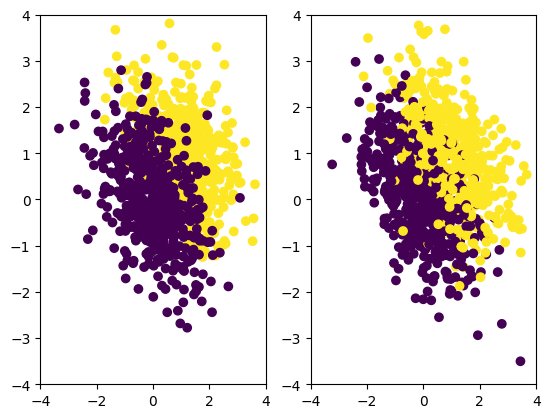

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1] , c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

Distribution is similar. However in the generative approach we cannot estimate the p(Y=1) for the general population, where in the discrimantive approach we can.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [13]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [14]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)
# ma wyjsc exp(1+beta_1), P(x|Y=-1) = C_pi,b_0 * exp(-(b_1+1)*x)
# Q2, Q3, C_pi,b_0=b_1+1, b_0 = f(b_1, pi) = ~ -1.39, what is the function?

(array([-1.30725537]), array([[0.87654072]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

Knowing that $f_{X|Y=-1}$ is an exponential distribution with parameter equal 2, and the integral of probability is equal to 1, we get $\frac{\exp(-\beta_0)}{2} = 2$. Which means that $C_{\beta_0, \pi} = \exp(-\beta_0) \frac{\pi}{1-\pi}$. We also know that $C_{\beta_0, \pi} = \beta_1+1$.

A hint: Of course it is, compute $\beta_0$.

$\beta_0 = ln(C_\pi/(1+\beta_1))= ln(0.25)=-ln(4)$

In [19]:
b1 = 1
c_pi = n1/(n1 + n2)
- np.log((beta1 + 1) * (1 - c_pi) / c_pi)

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)